# Transfer Learning 

<pre>
1. Download all the data in this folder https://drive.google.com/open?id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu. it contains two file both images and labels. The label file list the images and their categories in the following format:
            <b>path/to/the/image.tif,category</b>
            
    where the categories are numbered 0 to 15, in the following order:

    <b>0 letter
    1 form
    2 email
    3 handwritten
    4 advertisement
    5 scientific report
    6 scientific publication
    7 specification
    8 file folder
    9 news article
    10 budget
    11 invoice
    12 presentation
    13 questionnaire
    14 resume
    15 memo</b>
    
2. On this image data, you have to train 3 types of models as given below. You have to split the data into Train and Validation data.

3. Try not to load all the images into memory, use the gernarators that we have given the reference notebooks to load the batch of images only during the train data.
or you can use this method also
<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1</a>

<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c</a>


4. You are free to choose Learning rate, optimizer, loss function, image augmentation, any hyperparameters. but you have to use the same architechture what we are asking below. 

5. Use tensorboard for every model and analyse your gradients. (you need to upload the screenshots for each model for evaluation)

Note: fit_genarator() method will have problems with the tensorboard histograms, try to debug it, if you could not do use histgrams=0 i.e don't include histograms, check the documentation of tensorboard for more information. 

6. You can check about Transfer Learning in this link - <a href='https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html'>https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html</a>
</pre>

In [1]:
import os
import shutil
import csv
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import math
import datetime
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

## Creating folder structure

In [ ]:
with open('New folder\labels_final.csv','rt')as f:
    data = csv.reader(f)
    next(data, None)  
    for row in data:
        print(total)
        head, tail = os.path.split(str(row[0]))
        source = 'New folder/data_final/'+row[0]
        destination = 'New folder/Assignment_data/'+row[1]+'/'+tail
        #print(target)
        try:
            shutil.copyfile(source, destination)
        except IOError as e:
            os.makedirs(os.path.dirname(destination))
            #shutil.copy(src, dest)
            shutil.copyfile(source, destination)
        

In [2]:
dir_path = "New folder/Assignment_data/"

In [3]:
os.listdir(dir_path)

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [4]:
for i in os.listdir(dir_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(dir_path,i))))

No of Images in  0  category is  3015
No of Images in  1  category is  2994
No of Images in  10  category is  3002
No of Images in  11  category is  2992
No of Images in  12  category is  3006
No of Images in  13  category is  3007
No of Images in  14  category is  3004
No of Images in  15  category is  2996
No of Images in  2  category is  2993
No of Images in  3  category is  3005
No of Images in  4  category is  2994
No of Images in  5  category is  2999
No of Images in  6  category is  2985
No of Images in  7  category is  3000
No of Images in  8  category is  3003
No of Images in  9  category is  3001


In [4]:
import cv2

In [7]:
##Getting size of images
list_of_heights = []
list_of_widths = []
for i in os.listdir(dir_path):
    for image in os.listdir(os.path.join(dir_path,i)):
        img = cv2.imread(os.path.join(os.path.join(dir_path,i),image), cv2.IMREAD_UNCHANGED)
        # get dimensions of image
        shape = img.shape
        list_of_heights.append(shape[0])
        list_of_widths.append(shape[1])

(0, 900)

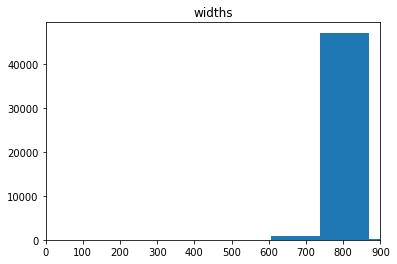

In [23]:
##plotting 
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(list_of_widths,bins=20)
plt.title('widths')
plt.xlim(0,900)

In [3]:
###Image data Generator class
ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator()
##We are fitting the data to Image data generator.
ImageGenerator = ImageFlow.flow_from_directory(dir_path,target_size=(224,224),seed=84,batch_size=64)

Found 47996 images belonging to 16 classes.


In [4]:
##Checking time taken to load images. 
import time
start = time.time()
total_batches = 0

batches = 0
per_batch = 32
for x_batch, y_batch in ImageGenerator:
    batches += 1
    if batches >= 6899/per_batch:
        total_batches = total_batches + batches
        break 
end = time.time()
duration = end-start
print("{} batches: {} s".format(total_batches, duration))
print("{:0.5f} Images/s".format(per_batch*total_batches/duration))

216 batches: 229.88765478134155 s
30.06686 Images/s


In [4]:
img_width, img_height = 224,224
batch_size = 64

In [5]:
%load_ext tensorboard

In [6]:
log_dir="Tf_Model1_logs\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

In [7]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs=None): 
        if(logs.get('accuracy')>0.60):
            #print("\nReached %2.2f%% accuracy, so stopping training!!".format(60))
            print("\nReached {} accuracy, so stopping training!!".format((logs.get('accuracy'))*100))   
            self.model.stop_training = True
            
callbacks = myCallback()

In [8]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor="val_accuracy", factor=0.2, patience=3, min_lr=0.0001,mode='auto')

## Model 1 :

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights. 
2. After VGG-16 network without FC layers, add a new Conv block ( 1 Conv layer and 1 Maxpooling ), 2 FC layers and a output layer to classify 16 classes. You are free to choose any hyperparameters/parameters of conv block, FC layers, output layer. 
3. Final architecture will be <b>INPUT --> VGG-16 without Top layers(FC) --> Conv Layer --> Maxpool Layer --> 2 FC layers --> Output Layer</b>
4. Train only new Conv block, FC layers, output layer. Don't train the VGG-16 network. 

</pre>

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
#                                   featurewise_center=True,
 #                                   featurewise_std_normalization=True,
#                                 rotation_range=13,
#                                    width_shift_range=0.1,
#                                    height_shift_range=0.1,
#                                    zoom_range=0.1,
                                  validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    dir_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle='True',
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    dir_path, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle='True',
    subset='validation')


Found 33605 images belonging to 16 classes.
Found 14391 images belonging to 16 classes.


In [10]:
number_of_train_samples=33605
number_of_val_samples=14391
steps_per_epoch = int(number_of_train_samples / batch_size)
val_steps = int(number_of_val_samples / batch_size)
print(steps_per_epoch)
print(val_steps)

525
224


In [11]:
from tensorflow.keras.applications.vgg16 import VGG16
pre_trained_model = VGG16(input_shape = (img_height, img_width,3), 
                                include_top = False, 
                                weights='imagenet')


In [12]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [14]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

new_layers = layers.Conv2D(filters=64,kernel_size=(4,4),strides=(1,1),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=3))(last_output)
new_layers = layers.MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='valid',data_format='channels_last')(new_layers)
new_layers = layers.Flatten(data_format='channels_last')(new_layers)
new_layers = layers.Dropout(0.5)(new_layers)
new_layers = layers.Dense(units=128,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32))(new_layers)  
new_layers = layers.Dropout(0.2)(new_layers)
new_layers = layers.Dense(units=64,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32))(new_layers)  
new_layers = layers.Dense(units=16,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3))(new_layers)  


In [15]:
from tensorflow.keras import Model

model_1 = Model( pre_trained_model.input, new_layers) 
model_1.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

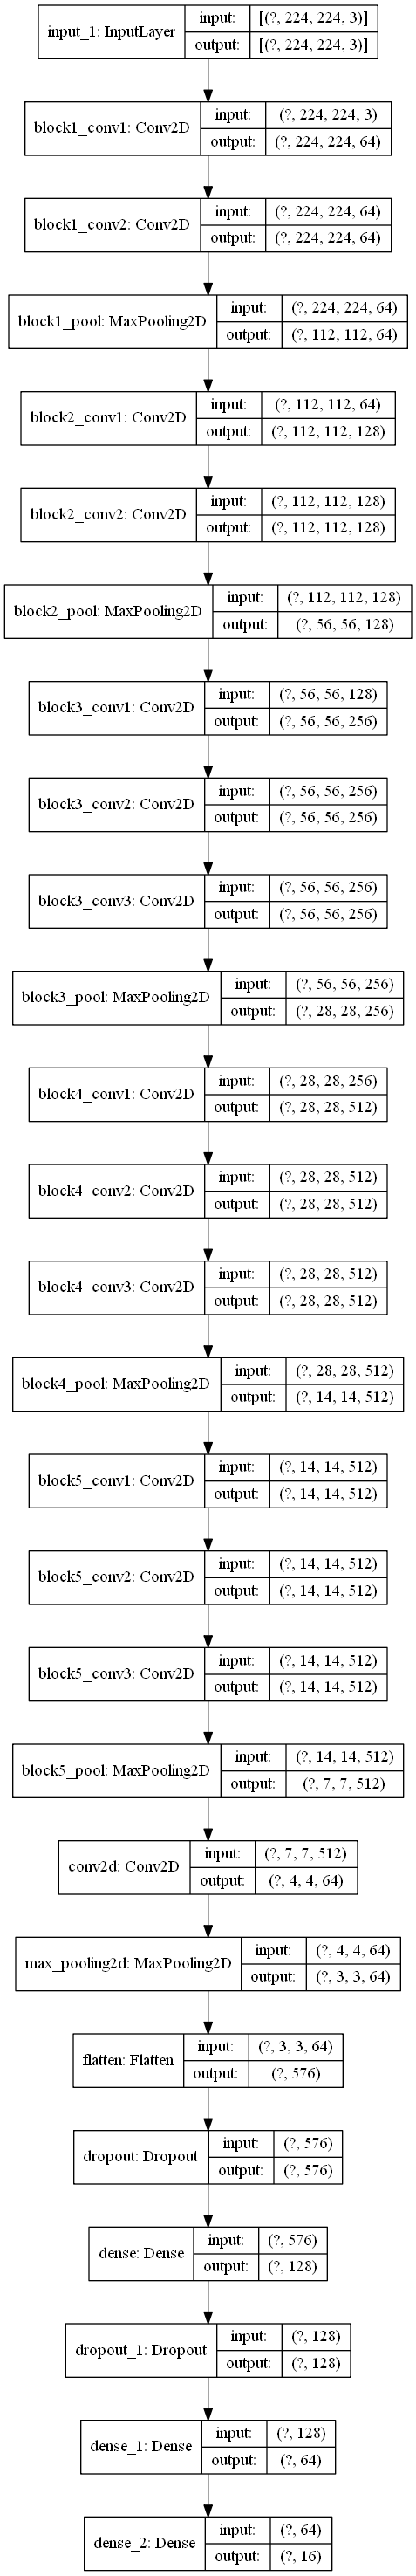

In [16]:
plot_model(model_1, 'model_1.png',show_shapes=True)

In [17]:
#model_1.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(lr=0.0001), metrics=['accuracy'])
model_1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [18]:
history_1 = model_1.fit(train_generator, epochs=100, steps_per_epoch=50, validation_data = validation_generator, verbose = 1, validation_steps=25,shuffle=True,callbacks=[tensorboard_callback,callbacks])

Epoch 1/100
 1/50 [..............................] - ETA: 0s - loss: 3.0994 - accuracy: 0.1094WARNING:tensorflow:From C:\Users\Manali\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
50/50 [==============================] - 701s 14s/step - loss: 2.5875 - accuracy: 0.1572 - val_loss: 2.2579 - val_accuracy: 0.2875
Epoch 2/100
50/50 [==============================] - 660s 13s/step - loss: 2.0848 - accuracy: 0.3369 - val_loss: 2.0376 - val_accuracy: 0.3531
Epoch 3/100
50/50 [==============================] - 674s 13s/step - loss: 1.8848 - accuracy: 0.4141 - val_loss: 1.8637 - val_accuracy: 0.4462
Epoch 4/100
50/50 [==============================] - 637s 13s/step - loss: 1.8158 - accuracy: 0.4358 - val_loss: 1.8612 - val_accuracy: 0.4331
Epoch 5/100
50/50 [==============================] - 668s 13s/s

In [19]:
#history_12 = model_1.fit(train_generator, epochs=30, steps_per_epoch=100, validation_data = validation_generator, verbose = 1, validation_steps=50,shuffle=True,callbacks=[tensorboard_callback,callbacks])

In [1]:
#%tensorboard --logdir Tf_Model1_logs/

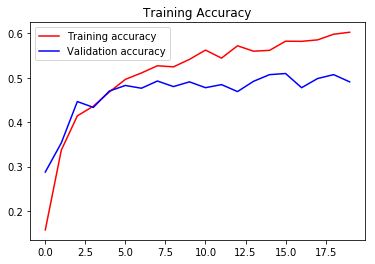

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training Accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

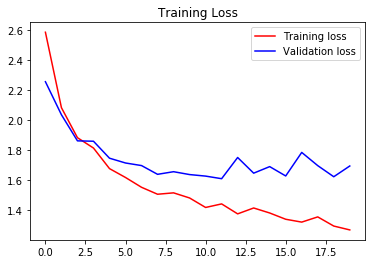

<Figure size 432x288 with 0 Axes>

In [22]:
epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training Loss')
plt.legend(loc=0)
plt.figure()


plt.show()

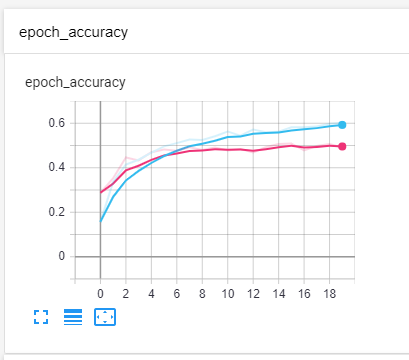

In [3]:
from PIL import Image
Image.open("model_1_acc.png")

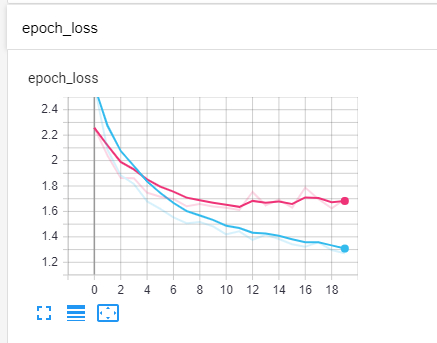

In [4]:
from PIL import Image
Image.open("model_1_loss.png")

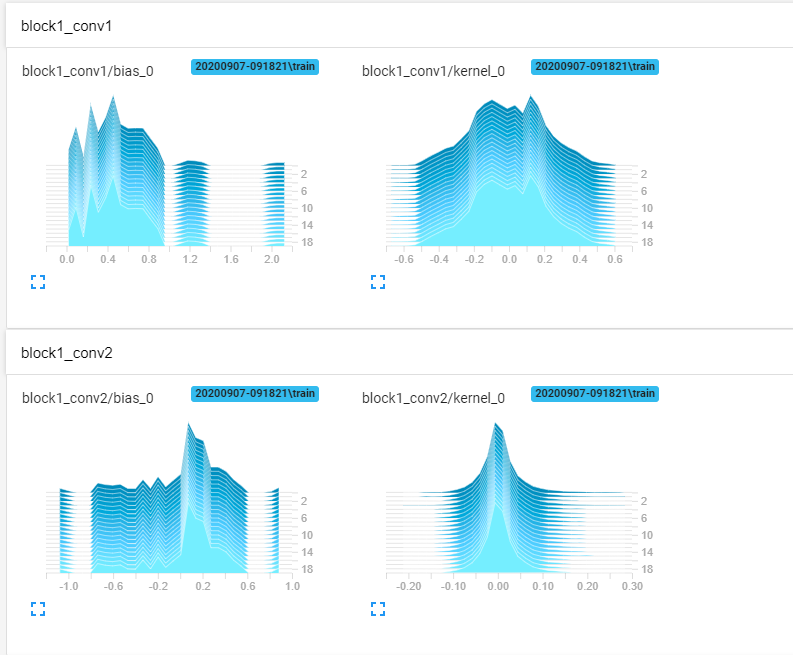

In [5]:
Image.open("model_1_block_1.png")

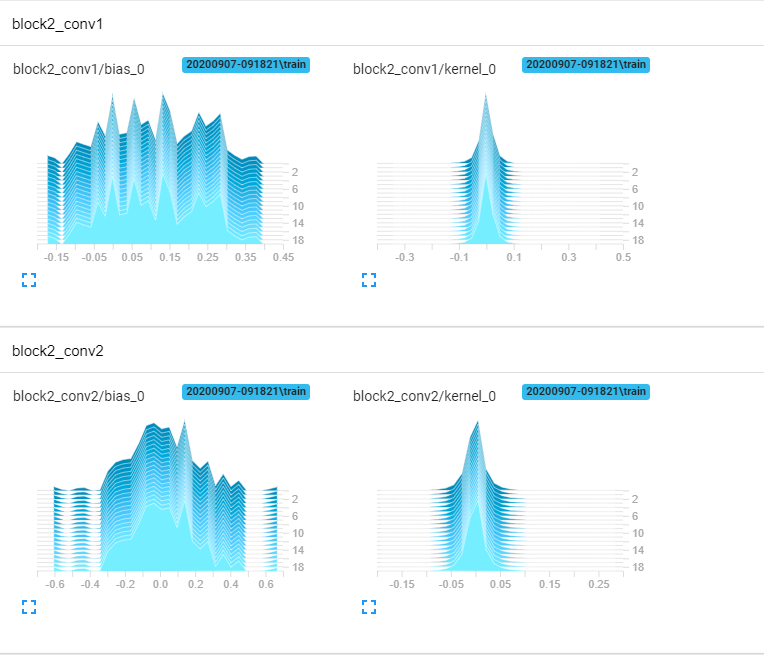

In [6]:
Image.open("model_1_block_2.png")

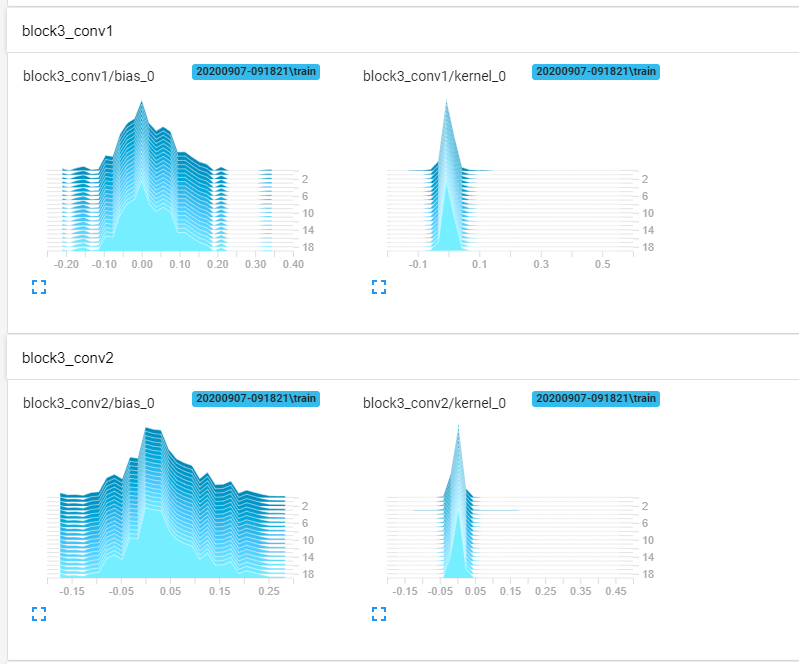

In [7]:
Image.open("model_1_block_3.png")

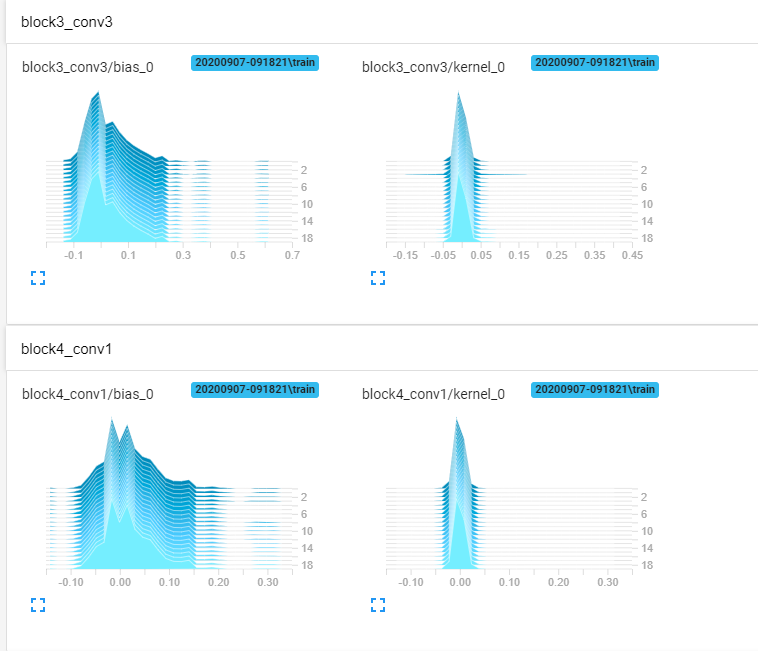

In [8]:
Image.open("model_1_block_4.png")

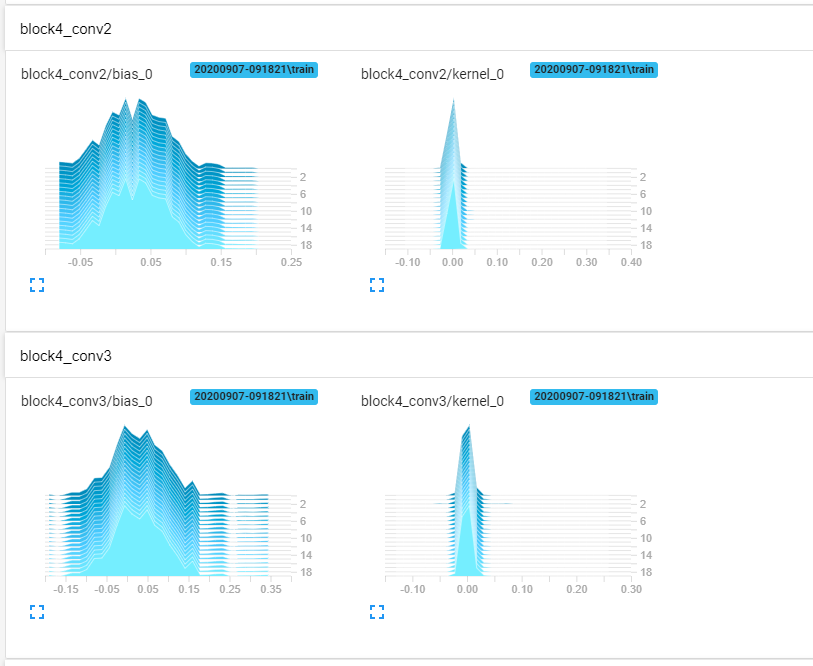

In [9]:
Image.open("model_1_block_5.png")

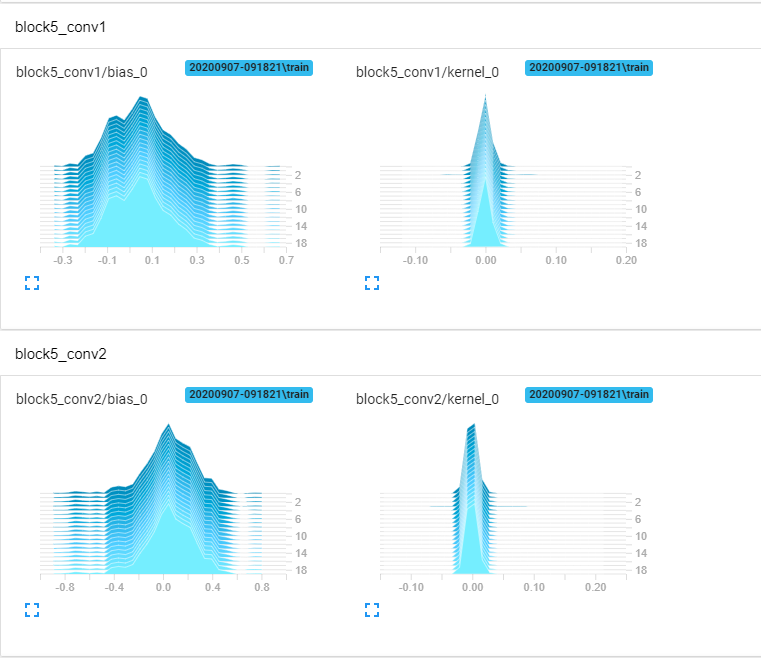

In [10]:
Image.open("model_1_block_6.png")

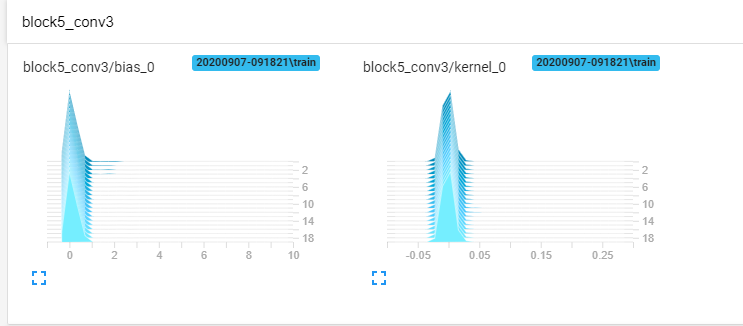

In [11]:
Image.open("model_1_block_7.png")

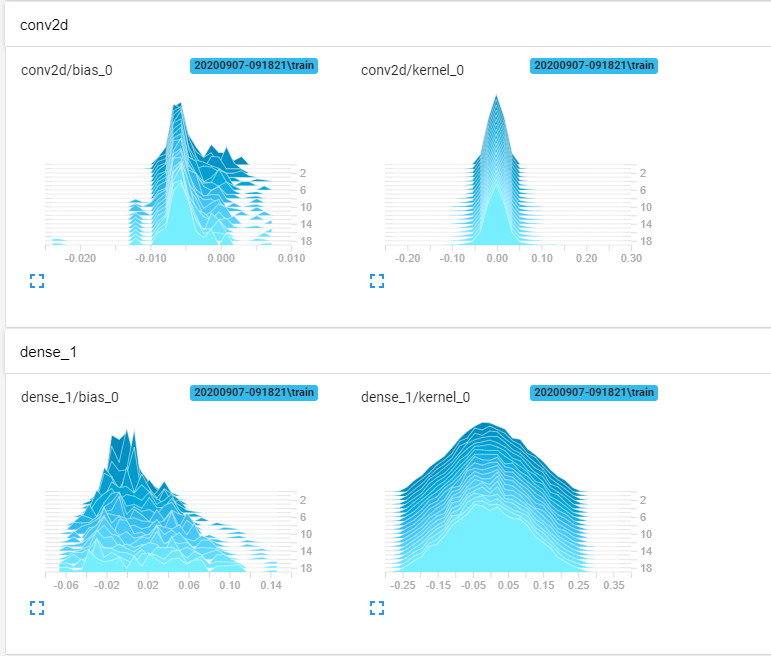

In [12]:
Image.open("model_1_block_8.png")

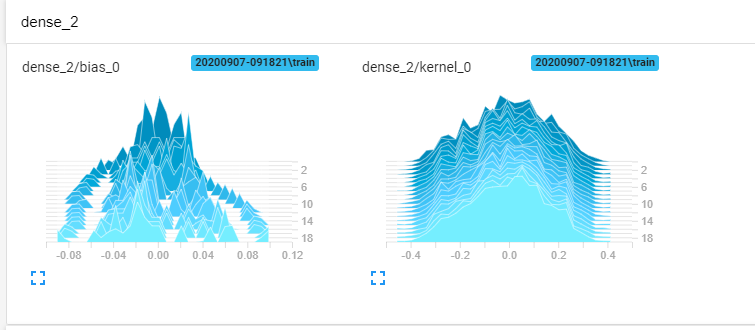

In [13]:
Image.open("model_1_dense_1.png")

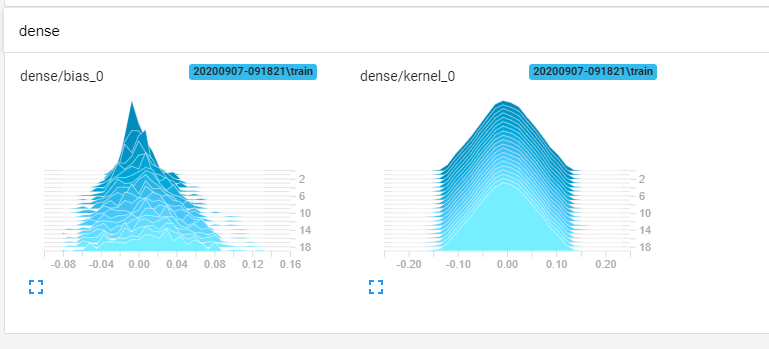

In [14]:
Image.open("model_1_dense_2.png")

observaion :
    In model 1, convolution is used with model architecture hence the training time is reduced. as epoch increased accuracy is increased and loss is decreased. The resultant parameter are 592,336.

## Model 2

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, don't use FC layers, use conv layers only as Fully connected layer. any FC layer can be converted to a CONV layer. This conversion will reduce the No of Trainable parameters in FC layers. For example, an FC layer with K=4096 that is looking at some input volume of size 7×7×512 can be equivalently expressed as a CONV layer with F=7,P=0,S=1,K=4096. In other words, we are setting the filter size to be exactly the size of the input volume, and hence the output will simply be 1×1×4096 since only a single depth column “fits” across the input volume, giving identical result as the initial FC layer. You can refer <a href='http://cs231n.github.io/convolutional-networks/#convert'>this</a> link to better understanding of using Conv layer in place of fully connected layers.
3. Final architecture will be VGG-16 without FC layers(without top), 2 Conv layers identical to FC layers, 1 output layer for 16 class classification. <b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>
3. Train only last 2 Conv layers identical to FC layers, 1 output layer. Don't train the VGG-16 network. 
</pre>

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16
pre_trained_model = VGG16(input_shape = (img_height, img_width,3), 
                                include_top = False, 
                                weights='imagenet')


In [121]:
log_dir="Tf_Model2_logs\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

In [122]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [123]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [129]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

new_layers = layers.Conv2D(64,kernel_size=[6,6], strides=(1,1), padding='Valid', activation='relu')(last_output)
#new_layers = layers.BatchNormalization()(new_layers)
new_layers = layers.Conv2D(20,kernel_size=[1,1], strides=(1,1), padding='Valid', activation='relu')(new_layers)
new_layers = layers.Dropout(0.5)(new_layers)
new_layers = layers.Flatten(data_format='channels_last')(new_layers)
new_layers = layers.Dropout(0.2)(new_layers)

new_layers = layers.Dense(units=16,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3))(new_layers)  


In [130]:
from tensorflow.keras import Model

model_2 = Model( pre_trained_model.input, new_layers) 
model_2.summary()

Model: "functional_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

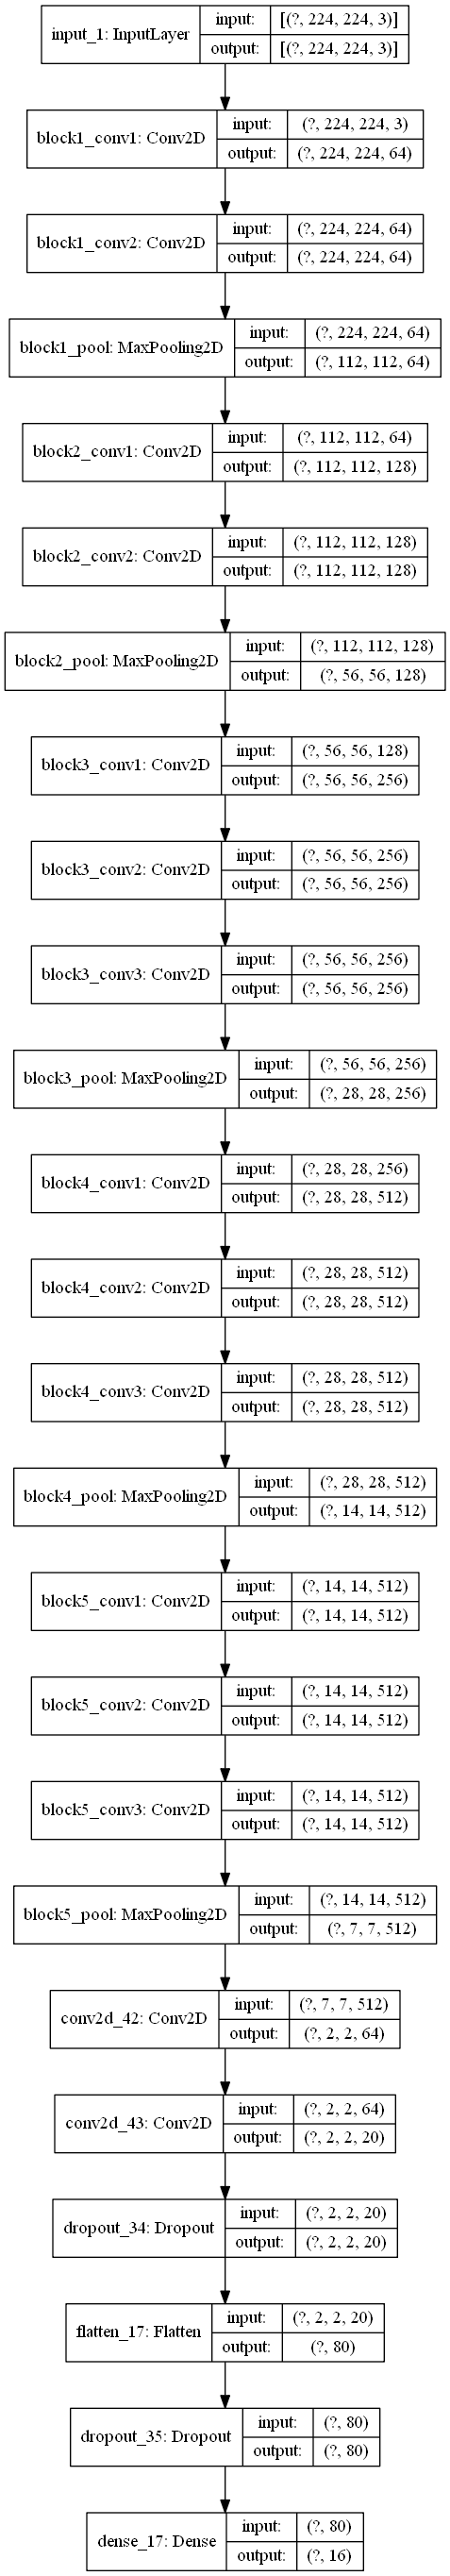

In [131]:
plot_model(model_2, 'model_2.png',show_shapes=True)

In [132]:
model_2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [133]:
history_2 = model_2.fit(train_generator, epochs=100, steps_per_epoch=50, validation_data = validation_generator, verbose = 1, validation_steps=25,callbacks=[tensorboard_callback,callbacks])

Epoch 1/100
50/50 [==============================] - 654s 13s/step - loss: 2.7172 - accuracy: 0.0887 - val_loss: 2.5947 - val_accuracy: 0.1906
Epoch 2/100
50/50 [==============================] - 684s 14s/step - loss: 2.5600 - accuracy: 0.1394 - val_loss: 2.4517 - val_accuracy: 0.2250
Epoch 3/100
50/50 [==============================] - 996s 20s/step - loss: 2.4804 - accuracy: 0.1700 - val_loss: 2.3159 - val_accuracy: 0.2569
Epoch 4/100
50/50 [==============================] - 1141s 23s/step - loss: 2.3791 - accuracy: 0.2100 - val_loss: 2.3581 - val_accuracy: 0.2619
Epoch 5/100
50/50 [==============================] - 1126s 23s/step - loss: 2.3036 - accuracy: 0.2442 - val_loss: 2.1652 - val_accuracy: 0.3125
Epoch 6/100
50/50 [==============================] - 1171s 23s/step - loss: 2.1883 - accuracy: 0.2819 - val_loss: 2.1196 - val_accuracy: 0.3506
Epoch 7/100
50/50 [==============================] - 784s 16s/step - loss: 2.1420 - accuracy: 0.2972 - val_loss: 2.0851 - val_accuracy: 0.3

In [ ]:
#history_21 = model_2.fit(train_generator, epochs=30, steps_per_epoch=50, validation_data = validation_generator, verbose = 1, validation_steps=math.ceil(1000//(batch_size)),callbacks=[tensorboard_callback,callbacks])

In [15]:
#%tensorboard --logdir Tf_Model2_logs/

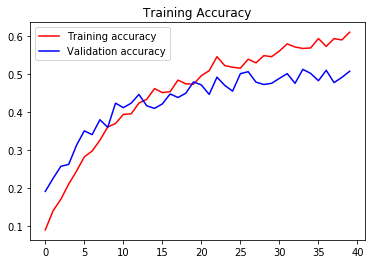

<Figure size 432x288 with 0 Axes>

In [135]:
import matplotlib.pyplot as plt
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training Accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

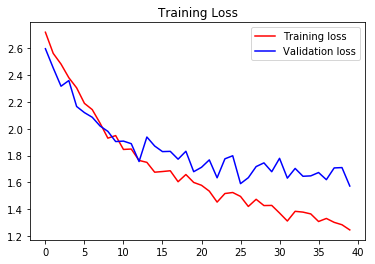

<Figure size 432x288 with 0 Axes>

In [136]:
epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training Loss')
plt.legend(loc=0)
plt.figure()


plt.show()

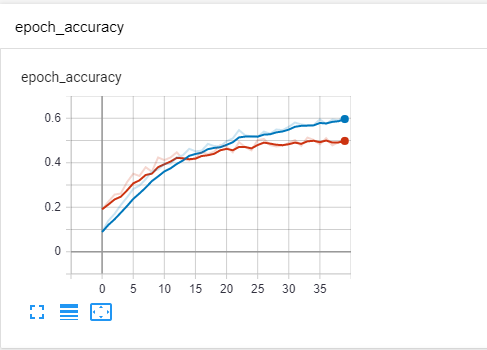

In [16]:
Image.open("model_2_acc.png")

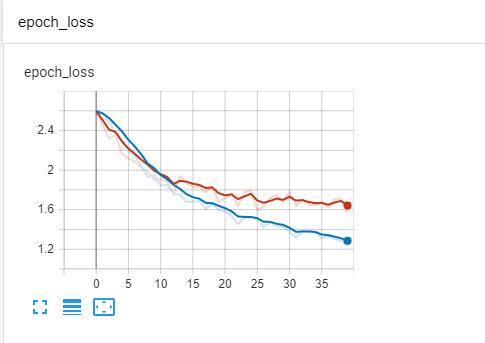

In [17]:
Image.open("model_2_loss.png")

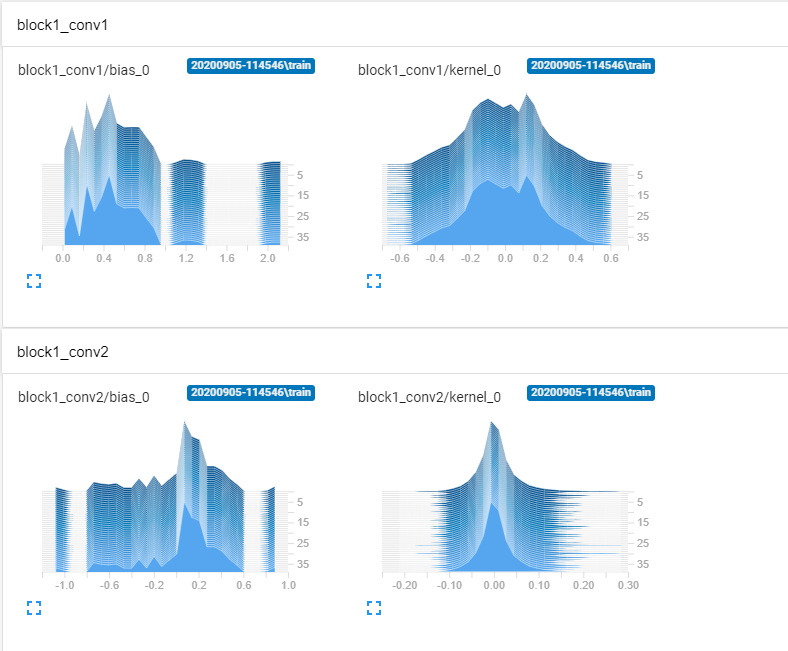

In [18]:
Image.open("model_2_block_1.png")

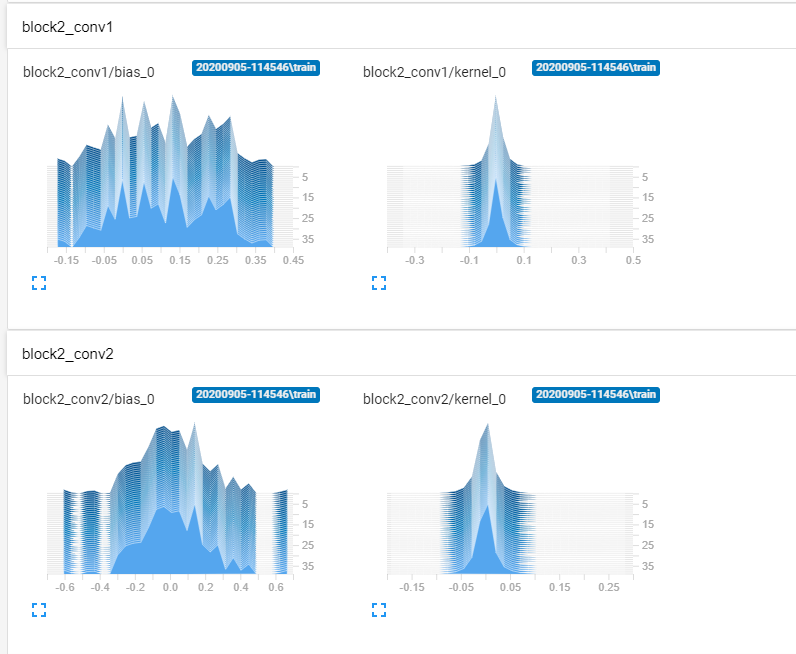

In [19]:
Image.open("model_2_block_2.png")

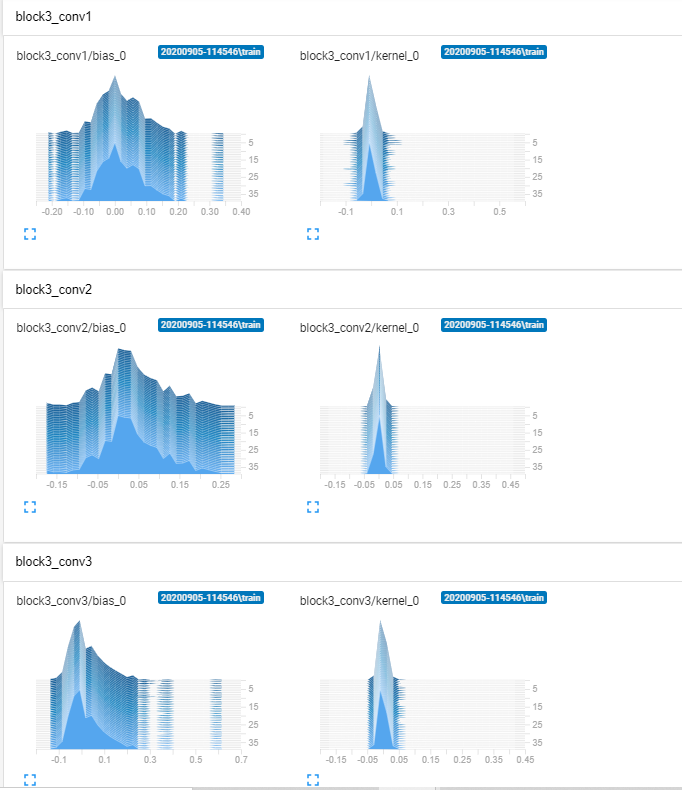

In [20]:
Image.open("model_2_block_3.png")

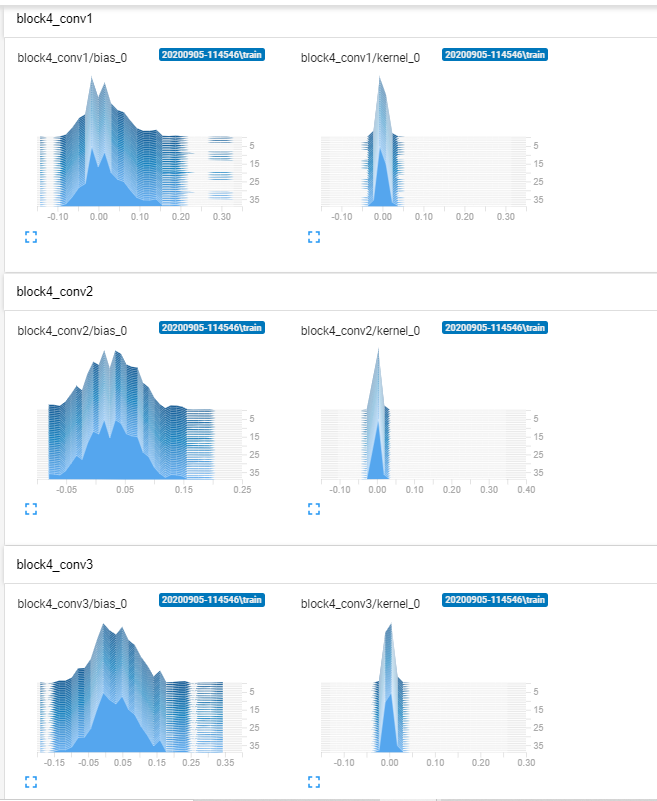

In [21]:
Image.open("model_2_block_4.png")

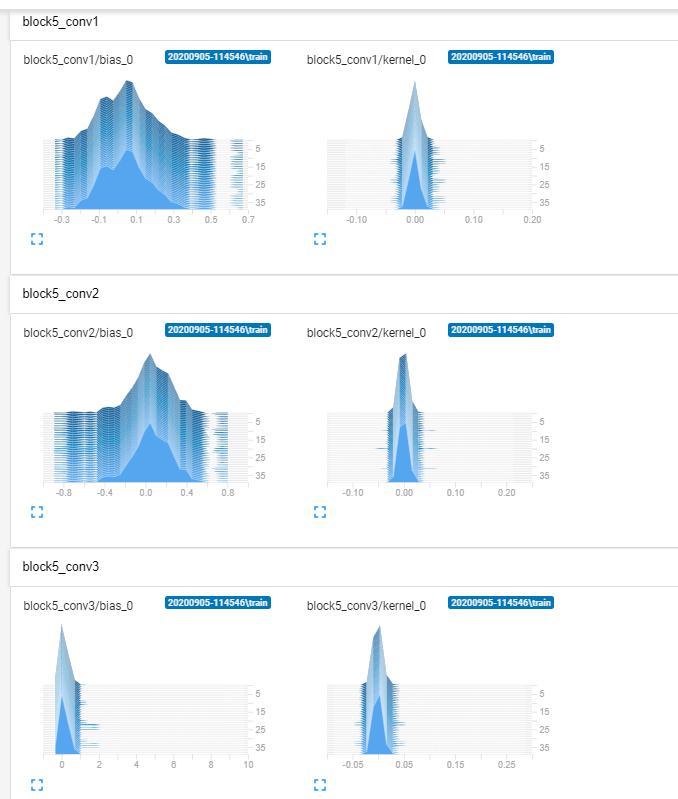

In [22]:
Image.open("model_2_block_5.png")

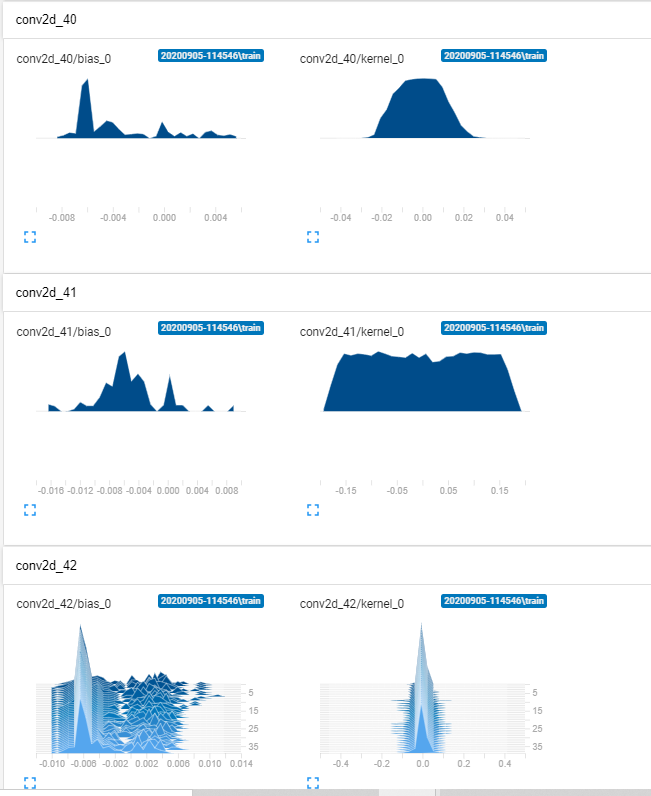

In [23]:
Image.open("model_2_block_6.png")

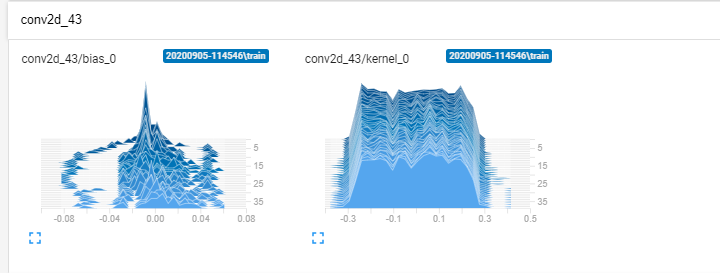

In [24]:
Image.open("model_2_1.png")

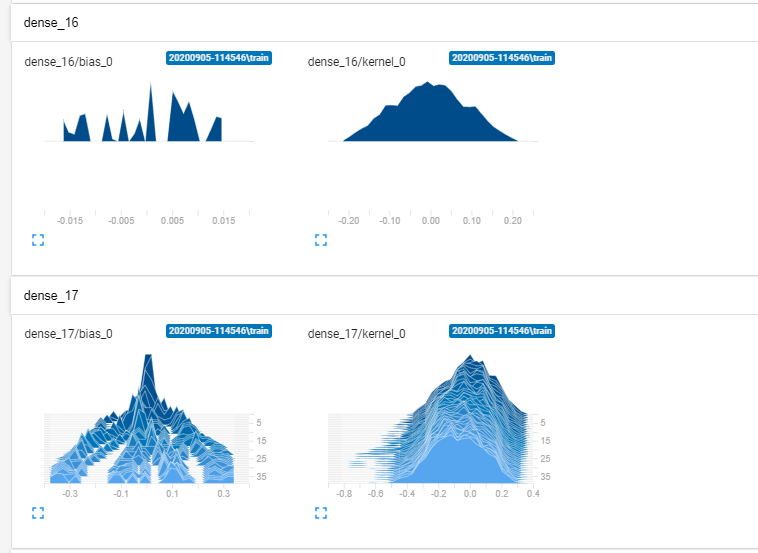

In [25]:
Image.open("model_2_2.png")

Observation :
     In model 2 ,dense layer is use as convolution layer hence total trainable paramters are increased.
     accuracy graph is increased as epochs increases and loss is decreased as the epochs increases. 
     In histogram there are change in range of weight in every layer.

## Model 3

<pre>
1. Use same network as Model-2 '<b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>' and train only Last 6 Layers of VGG-16 network, 2 Conv layers identical to FC layers, 1 output layer.
</pre>

In [22]:
log_dir="Tf_Model3_logs\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

In [11]:
for layer in pre_trained_model.layers:
    layer.trainable = False
    

In [12]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

new_layers = layers.Conv2D(4096,kernel_size=[7,7], strides=(1,1), padding='Valid', activation='relu')(last_output)

new_layers = layers.Conv2D(1000,kernel_size=[1,1], strides=(1,1), padding='Valid', activation='relu')(new_layers)

new_layers = layers.Flatten(data_format='channels_last')(new_layers)

new_layers = layers.Dense(units=16,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3))(new_layers)  


In [13]:
from tensorflow.keras import Model

model_3 = Model( pre_trained_model.input, new_layers) 


In [14]:
for i in range(1,11):
    model_3.layers[-i].trainable=True

In [15]:
model_3.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

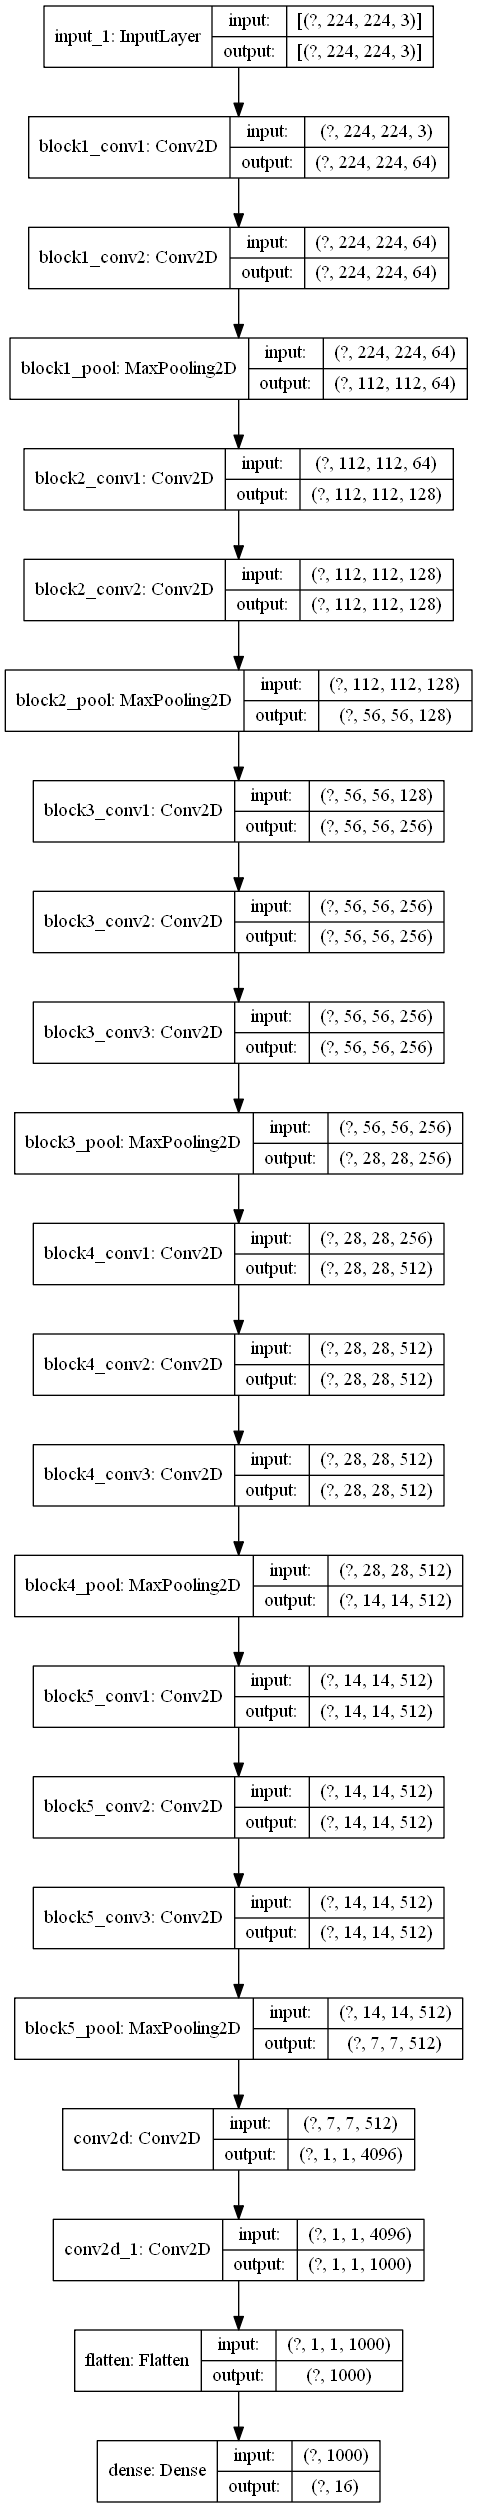

In [16]:
plot_model(model_3, 'model_3.png',show_shapes=True)

In [17]:
for layer in model_3.layers:
    print(layer, layer.trainable)


<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x00000260A0DBABE0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000260A1DEB2B0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000260A1DEB5C0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x00000260A1DEB9B0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000260A2066630> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000260A206F438> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x00000260A206F518> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000260A20760F0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000260A2076EF0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000260A207C320> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x00000260A207CBA8> False
<tensorflow.python.

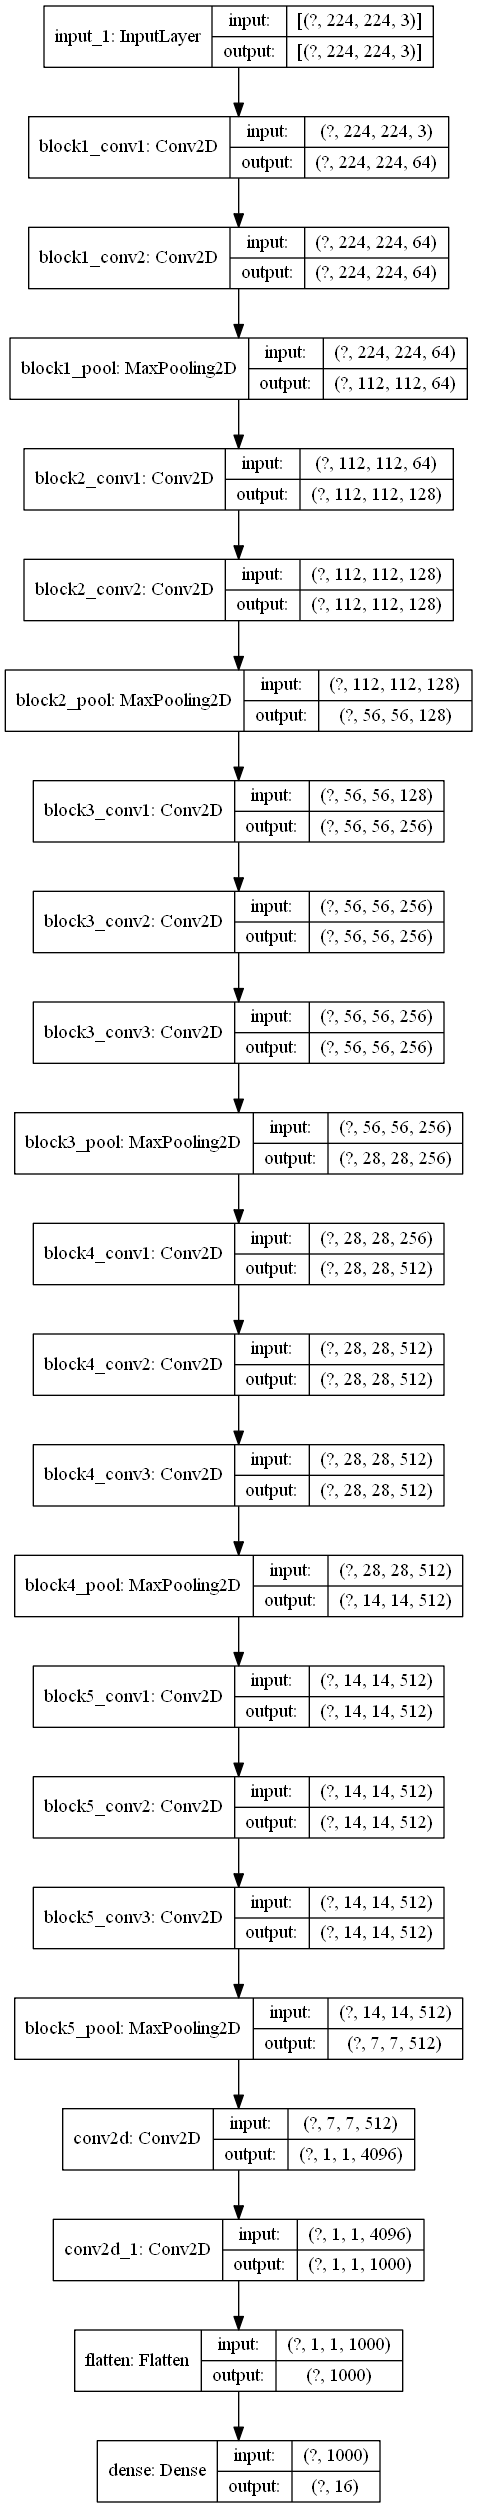

In [18]:
plot_model(model_3, 'model_3.png',show_shapes=True)

In [23]:

#model_3.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
model_3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history_3 = model_3.fit(train_generator, epochs=6, steps_per_epoch=50, validation_data = validation_generator, verbose = 1, validation_steps=math.ceil(1000//(batch_size)),callbacks=tensorboard_callback)

Epoch 1/6
50/50 [==============================] - 1645s 33s/step - loss: 2.7735 - accuracy: 0.0668 - val_loss: 2.7723 - val_accuracy: 0.0640
Epoch 2/6
50/50 [==============================] - 1637s 33s/step - loss: 2.7727 - accuracy: 0.0660 - val_loss: 2.7720 - val_accuracy: 0.0700
Epoch 3/6
50/50 [==============================] - 1633s 33s/step - loss: 2.7726 - accuracy: 0.0648 - val_loss: 2.7725 - val_accuracy: 0.0580
Epoch 4/6
50/50 [==============================] - 1634s 33s/step - loss: 2.7730 - accuracy: 0.0644 - val_loss: 2.7736 - val_accuracy: 0.0570
Epoch 5/6
50/50 [==============================] - 1948s 39s/step - loss: 2.7727 - accuracy: 0.0604 - val_loss: 2.7723 - val_accuracy: 0.0610
Epoch 6/6
50/50 [==============================] - 2974s 59s/step - loss: 2.7729 - accuracy: 0.0619 - val_loss: 2.7722 - val_accuracy: 0.0680


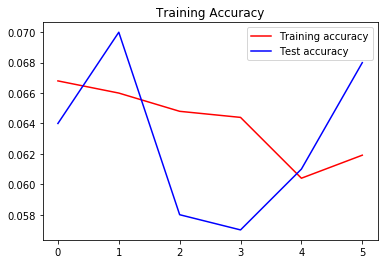

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Test accuracy')
plt.title('Training Accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [29]:
#%tensorboard --logdir Tf_Model3_logs

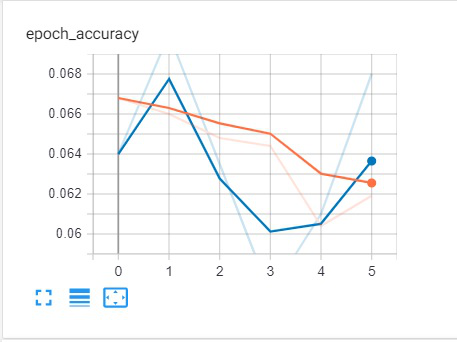

In [7]:
from PIL import Image
Image.open("model_3_acc.jpg")

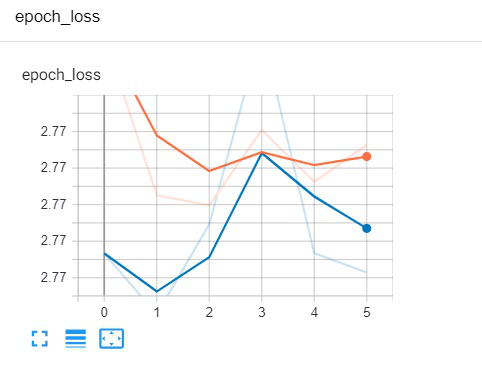

In [8]:
Image.open("model_3_loss.jpg")

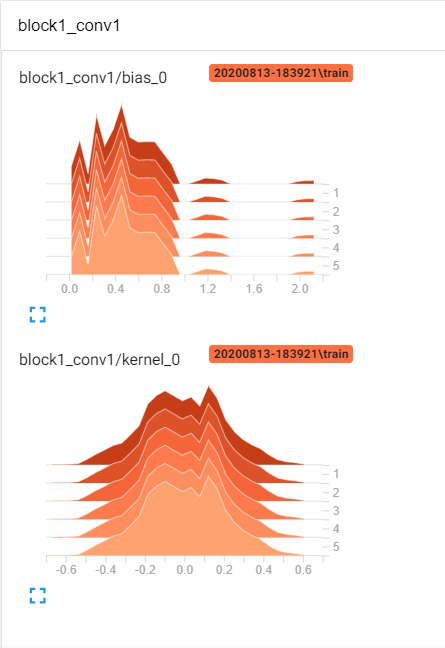

In [13]:
Image.open("model_3_block_1.jpg")


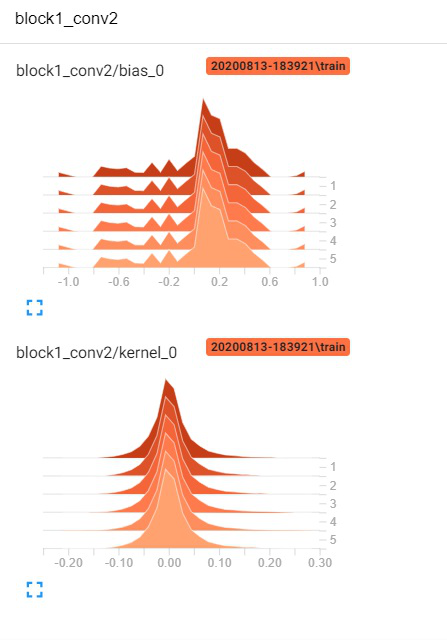

In [14]:
Image.open("model_3_block_1_c2.jpg")

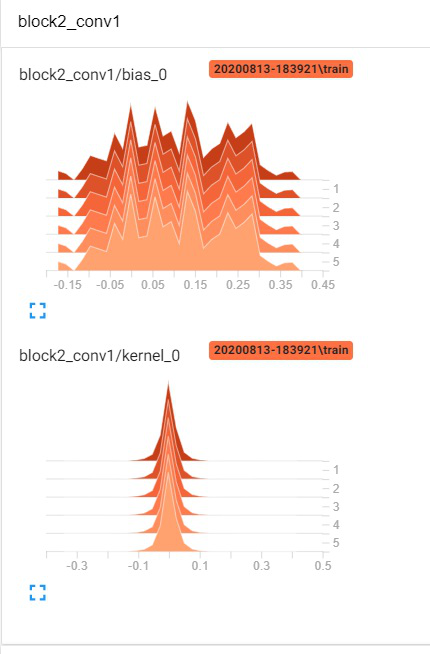

In [15]:
Image.open("model_3_block_2.jpg")

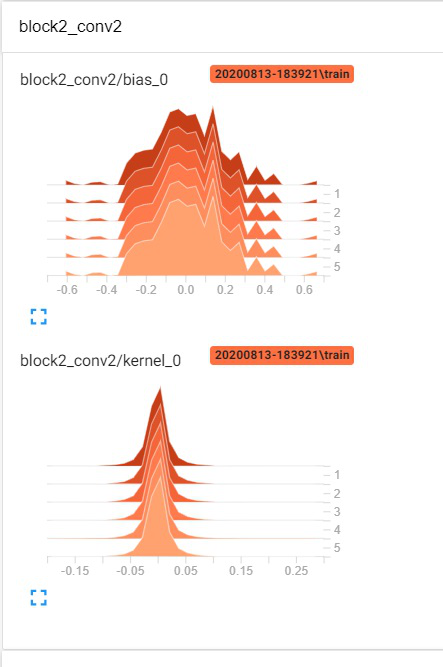

In [16]:
Image.open("model_3_block_2_c2.jpg")

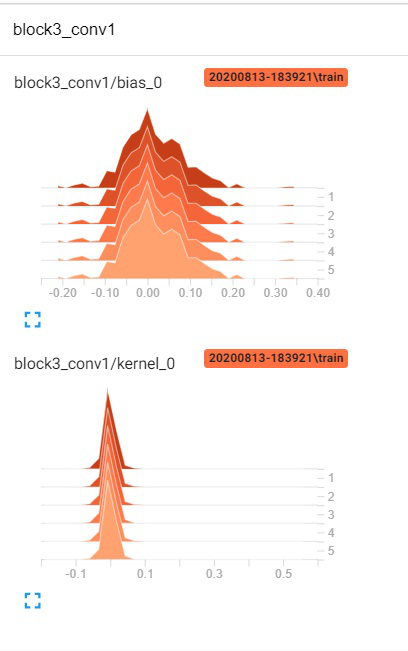

In [17]:
Image.open("model_3_block_3.jpg")

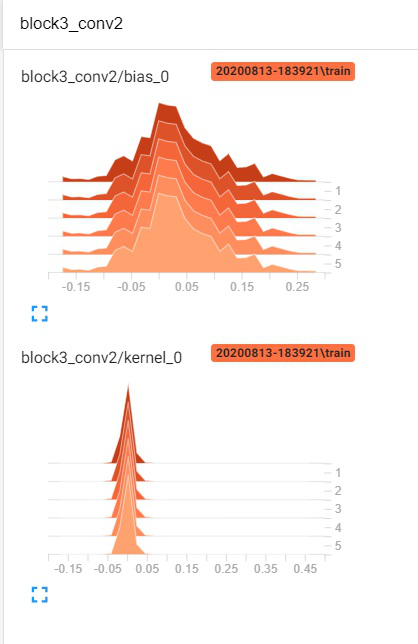

In [18]:
Image.open("model_3_block_3_c2.jpg")

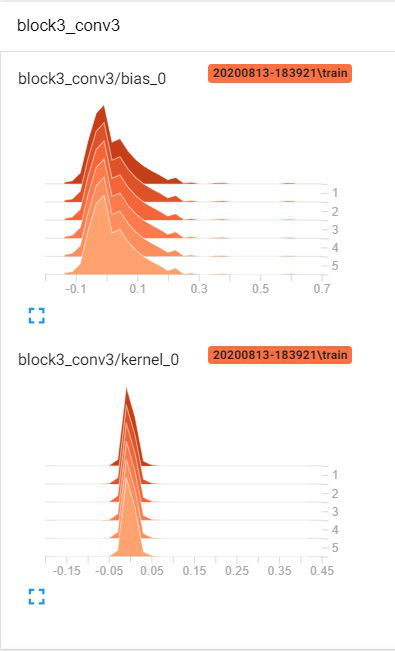

In [19]:
Image.open("model_3_block_3_c3.jpg")

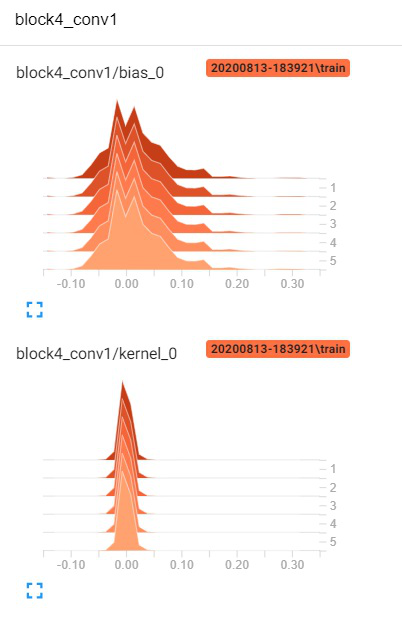

In [20]:
Image.open("model_3_block_4.jpg")

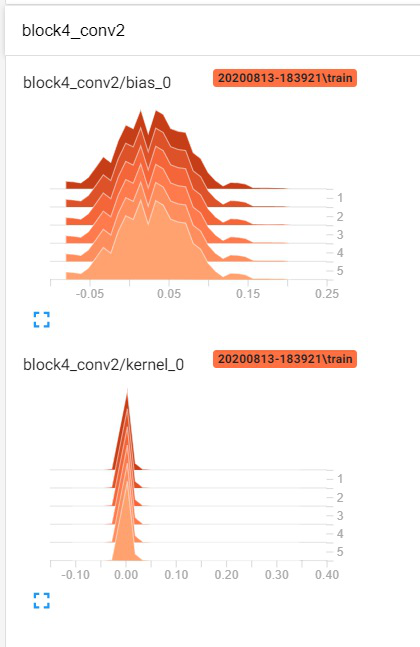

In [21]:
Image.open("model_3_block_4_c2.jpg")

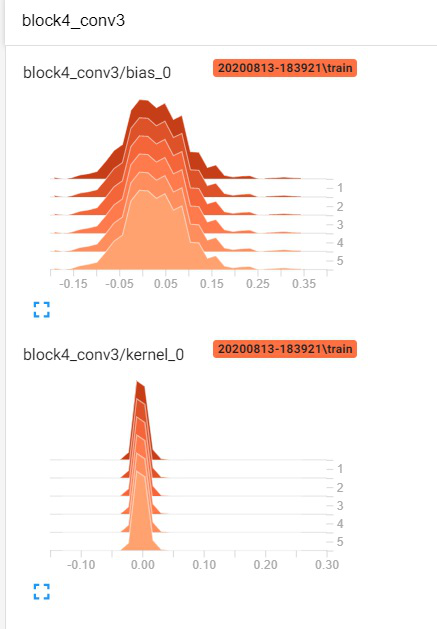

In [22]:
Image.open("model_3_block_4_c3.jpg")

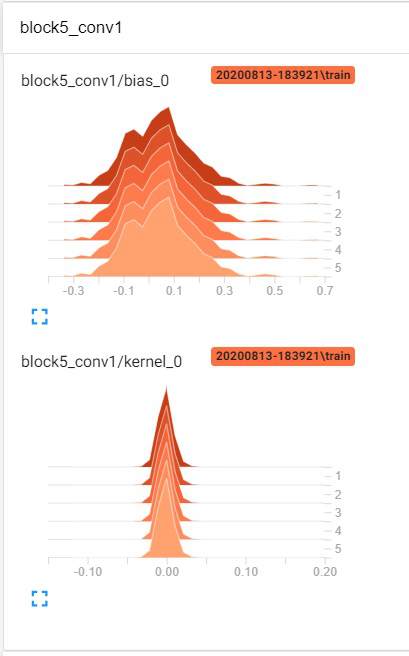

In [23]:
Image.open("model_3_block_5.jpg")

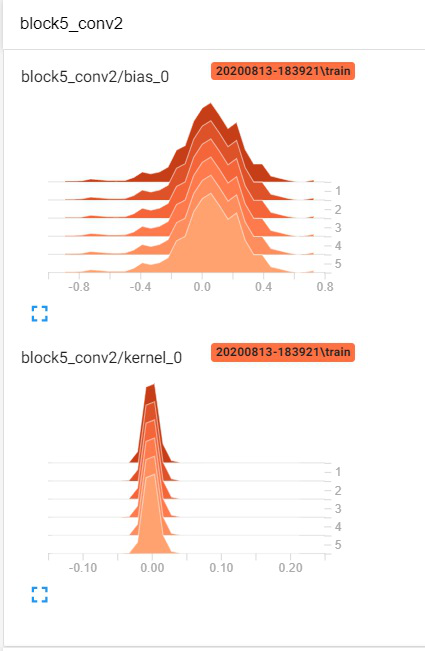

In [24]:
Image.open("model_3_block_5_c2.jpg")

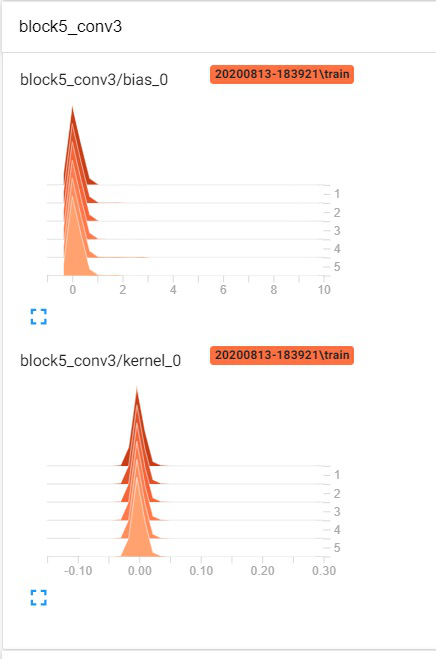

In [25]:
Image.open("model_3_block_5_c3.jpg")

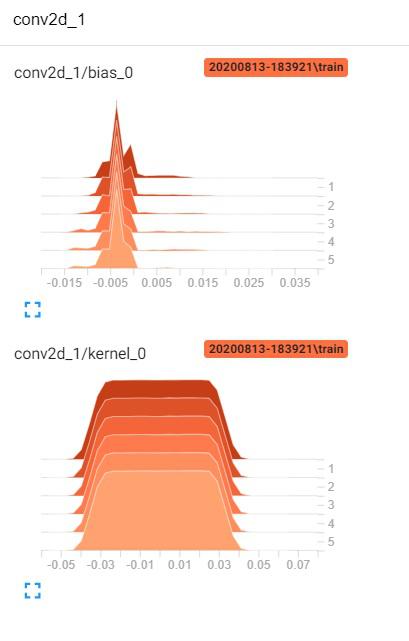

In [26]:
Image.open("model_3_block_6.jpg")

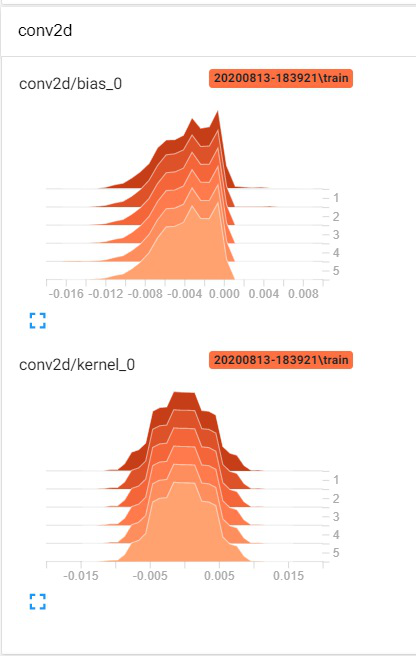

In [27]:
Image.open("model_3_block_7.jpg")

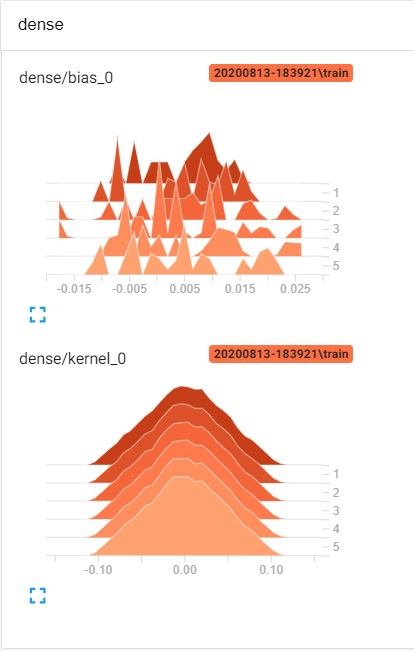

In [28]:
Image.open("model_3_block_8.jpg")

Observation :
    Model is trained with 1. last 6 layers of VGG-16 without Top layers 2. conv Layers identical to Fully conncted layer.Hence it took more time to train.There is much differnce in weight at each layer. Train accuracy is increased from 4 eppoch and test accuracy is increased from 3 epochs .